In [1]:
from pathlib import Path
import re
from collections import Counter
from htmd.ui import *
from tqdm import tqdm

ffevaluate module is in beta version

Please cite HTMD: Doerr et al.(2016)JCTC,12,1845. 
https://dx.doi.org/10.1021/acs.jctc.6b00049
Documentation: http://software.acellera.com/
To update: conda update htmd -c acellera -c psi4

You are on the latest HTMD version (1.13.9).



In [2]:
# get all pdbs
data_root = Path("../data/training_data")
pdbs = list(data_root.glob("*lig_cg.pdb"))

In [3]:
def get_bounding_box(path): 
    mol = Molecule(str(path), keepaltloc='all')
    bb = htmd.molecule.util.boundingBox(mol)
    return bb[1] - bb[0]

In [4]:
len(pdbs)

3000

In [5]:
bounding_boxes = []
for pdb in tqdm(pdbs):
    bounding_boxes.append(get_bounding_box(pdb))

100%|██████████| 3000/3000 [01:41<00:00, 29.42it/s]


In [6]:
dimensions = [l for bb in bounding_boxes for l in bb]

In [7]:
import seaborn as sns

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


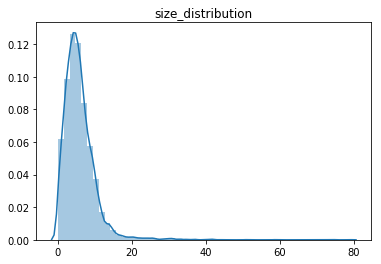

In [11]:
plt = sns.distplot(dimensions)
plt.set_title('size_distribution')
print()

In [12]:
dims_less_than_24 = list(filter(lambda x: x <= 24, dimensions))

In [13]:
print('Num dimensions less than or eq 24')
len(dims_less_than_24)/len(dimensions)

Num dimensions less than or eq 24


0.9917777777777778

In [14]:
print('Num ligands with at least 1 dim <= 24')
mols_less_than_24 = list(filter(lambda bb: bb[0] <= 24 and bb[1] <=24 and bb[2] <= 24, bounding_boxes))
len(mols_less_than_24)/len(bounding_boxes)

Num ligands with at least 1 dim <= 24


0.9816666666666667